In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
sys.path.append('/content/drive/My Drive/python')

In [3]:
from keras.datasets import cifar10
import cv2 as cv2
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import model_from_json
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, f1_score, precision_score, recall_score,  confusion_matrix
import os

Using TensorFlow backend.


In [0]:
import cf_matrix as cf

In [0]:
def load_model(jsonfile,weightfiles):
    # load json and create model
    json_file = open(jsonfile, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(weightfiles)
    print("Loaded model from disk")
    return loaded_model
    
def load_cifar10_data(img_rows, img_cols):
    (X_train,Y_train), (X_test, Y_test) = cifar10.load_data()
    
    X_train = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_train[:,:,:,:]])
    X_test  = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X_test[:,:,:,:]])
    
    classes = np.unique(Y_train)
    nClasses = len(classes)
    X_train.shape, X_test.shape
    Y_train  = to_categorical(Y_train,nClasses)
    Y_test  = to_categorical(Y_test,nClasses)    
    
    X_train = X_train.astype('float16')
    X_test = X_test.astype('float16')
    X_train = X_train / 255.
    X_test = X_test  / 255.
    
    return X_train, Y_train, X_test, Y_test, nClasses

In [0]:
jsonfile = '/content/drive/My Drive/python/modelConvNet573_150.json'
weightfiles = '/content/drive/My Drive/python/model_weightsConvNet573_150.h5'

In [7]:
loaded_model = load_model(jsonfile,weightfiles)

Loaded model from disk


In [8]:
X_train, Y_train, X_test, Y_test, nClasses = load_cifar10_data(150,150)
xdata = np.concatenate((X_train, X_test), axis=0)
ydata = np.concatenate((Y_train, Y_test), axis=0)
X_train,X_test,Y_train,Y_test = train_test_split(xdata, ydata, test_size=0.2, random_state=35,shuffle=True)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

170500096/170498071 [==============================] - 3s 0us/step


((48000, 150, 150, 3), (12000, 150, 150, 3), (48000, 10), (12000, 10))

In [0]:
Ypred = loaded_model.predict(X_test)
Ypred = np.argmax((Ypred),axis=1)
Ytest = np.argmax((Y_test),axis=1)

Confusion matrix, without normalization
[[1173    1   14    1    1    1    2    0    5    1]
 [   2 1207    0    0    0    1    0    0    3   14]
 [   2    0 1094    5    7    4    1    1    1    1]
 [   3    0    5 1120    2   16    3    3    0    1]
 [   1    0    6    7 1183    2    3    6    2    0]
 [   0    0    9   35    5 1097    1    4    0    2]
 [   2    1   13   29    7    9 1209    3    1    0]
 [   4    0    7    8    7    7    0 1166    0    3]
 [   6    0    1    1    2    1    0    0 1201    4]
 [   2    6    0    1    0    0    1    0    2 1238]]


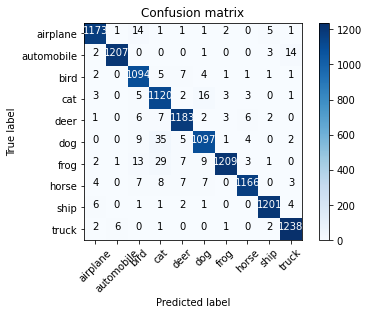

In [10]:
cm = confusion_matrix(Ypred, Ytest)
class_name = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
cf.plot_confusion_matrix(cm, class_name)